In [ ]:
# 1. GPU ရွေးမယ်
# Edit => Notebook Settings မှာ GPU ကို ရွေးပေးရမယ် မဟုတ်ရင် Run ရတာ အသေကြာနေလိမ့်မယ်
# Checking whether the GPU Device is selected or not
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
%time

Found GPU at: /device:GPU:0
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.48 µs


In [ ]:
import os
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras.preprocessing import image
import numpy as np

In [ ]:
# 3. google drive နဲ့ ချိတ်ပါ
from google.colab import drive
 
drive.mount("/content/gdrive/")

Mounted at /content/gdrive/


In [ ]:
# 4. Directory of Data Folders
# မိမိရဲ့ ပတ်လမ်းကြောင်း ပြောင်းဖို့ မမေ့ပါနဲ့

train_dir  = '/content/gdrive/MyDrive/Traffic/Train'
test_dir   = '/content/gdrive/MyDrive/Traffic/Test'

In [ ]:
# training data နဲ့ testing data ခွဲတာ
#from sklearn.model_selection import train_test_split
#X_train, X_test = train_test_split(iris_data.iloc[:,:-1], iris_data.iloc[:,-1], test_size = 0.25, random_state = 0)

In [ ]:
# 5. Neural Network Implemenation(CNN)
""" နောက်ဆုံး Layer မှာ ကိုယ့်ရဲ့ Label အရေအတွက် အတိုင်းထည့်ပေးရမှာပါ။ 
    Label က ငါးခုဆိုရင် tf.keras.layers.Dense(5,activation=tf.nn.softmax)
 
    Label က နှစ်ခုဆိုရင်တော့ tf.keras.layers.Dense(1,activation=tf.nn.sigmoid)
    Activation ကို sigmoid ပြောင်းသုံးသင့်ပါတယ်။

    Label က နှစ်ခုနဲ့အထက်ဆိုရင်တော့ (n = more than two classes) ဆိုရင်တော့ tf.keras.layers.Dense(n,activation=tf.nn.softmax)
    Activation ကို softmax ပြောင်းသုံးသင့်ပါတယ်။
"""
# 
import tensorflow as tf
model           = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(20, activation = 'relu'),
    tf.keras.layers.Dense(5,activation='softmax')
])

In [ ]:
# 5. Neural Network Implemenation
""" နောက်ဆုံး Layer မှာ ကိုယ့်ရဲ့ Label အရေအတွက် အတိုင်းထည့်ပေးရမှာပါ။ 
    Label က ငါးခုဆိုရင် tf.keras.layers.Dense(5,activation=tf.nn.softmax)
 
    Label က နှစ်ခုဆိုရင်တော့ tf.keras.layers.Dense(1,activation=tf.nn.sigmoid)
    Activation ကို sigmoid ပြောင်းသုံးသင့်ပါတယ်။

    Label က နှစ်ခုနဲ့အထက်ဆိုရင်တော့ (n = more than two classes) ဆိုရင်တော့ tf.keras.layers.Dense(n,activation=tf.nn.softmax)
    Activation ကို softmax ပြောင်းသုံးသင့်ပါတယ်။
"""
# 
#import tensorflow as tf
 
#model  = tf.keras.models.Sequential([
        #tf.keras.layers.Flatten(input_shape = (150, 150, 3)),
        #tf.keras.layers.Dense(1000,activation=tf.nn.relu),#hidden
        #tf.keras.layers.Dense(500,activation=tf.nn.relu),
        #tf.keras.layers.Dense(200,activation=tf.nn.relu),
        #tf.keras.layers.Dense(20,activation=tf.nn.relu),
        #tf.keras.layers.Dense(2,activation=tf.nn.softmax) # output layers
])


In [ ]:
# label က နှစ်ခုပဲဆိုရင်တော့ binary_crossentropy ကိုသုံးသင့်ပါတယ်။
# label က နှစ်ခုအထက် ဆိုရင်တော့ categorical_crossentropyကိုသုံးသင့်ပါတယ်။
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics =['acc'])

In [ ]:
# ပုံတွေရဲ့ Range  ကို scale လုပ်တာ။
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

In [ ]:
import os 
os.listdir(train_dir)

['Roundabout', 'Stop', 'NoHorn', 'Giveway', 'NoEntery']

In [ ]:
os.listdir(train_dir+'/Stop')

['00013_00005.jpg',
 '14_29596_1577672016.8948958.jpg',
 '00012_00013.jpg',
 '00021_00014.jpg',
 '00023_00026.jpg',
 '00016_00007.jpg',
 '00019_00028.jpg',
 '14_29884_1577672017.1406488.jpg',
 '00025_00001.jpg',
 '14_29624_1577672016.9147124.jpg',
 '14_29360_1577672016.6884155.jpg',
 '14_29487_1577672016.8091323.jpg',
 '00022_00025.jpg',
 '14_29419_1577672016.7452865.jpg',
 '14_29762_1577672017.0343928.jpg',
 '14_29458_1577672016.7811687.jpg',
 '14_29229_1577672016.562753.jpg',
 '14_29347_1577672016.678443.jpg',
 '00008_00024.jpg',
 '14_29354_1577672016.68343.jpg',
 '00017_00028.jpg',
 '00023_00025.jpg',
 '00024_00024.jpg',
 '00009_00019.jpg',
 '14_29582_1577672016.8839262.jpg',
 '14_29477_1577672016.8001173.jpg',
 '14_29635_1577672016.9246855.jpg',
 '00017_00026.jpg',
 '14_29572_1577672016.8769448.jpg',
 '14_29364_1577672016.6924057.jpg',
 '14_29785_1577672017.0533428.jpg',
 '14_29402_1577672016.729308.jpg',
 '14_29506_1577672016.825084.jpg',
 '00011_00003.jpg',
 '14_29560_1577672016.

In [ ]:
import cv2
image = cv2.imread(train_dir+'/Stop/'+'00008_00018.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

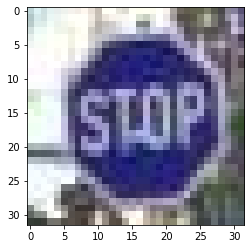

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(image)

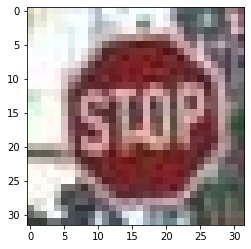

In [ ]:
# ပုံတစ်ပုံကို ထုတ်ကြည့်ထားတာ
plt.imshow(image_rgb)

In [ ]:
import numpy as np
np.array(image_rgb)

array([[[215, 213, 190],
        [244, 242, 221],
        [224, 223, 205],
        ...,
        [147, 132, 135],
        [156, 127, 132],
        [118,  83,  90]],

       [[199, 198, 177],
        [234, 233, 213],
        [224, 225, 209],
        ...,
        [160, 145, 148],
        [214, 187, 194],
        [142, 109, 116]],

       [[202, 203, 185],
        [235, 238, 221],
        [233, 237, 222],
        ...,
        [108,  93,  98],
        [200, 173, 182],
        [131, 100, 108]],

       ...,

       [[133, 136, 129],
        [214, 219, 213],
        [242, 244, 241],
        ...,
        [108, 111, 100],
        [ 91,  94,  83],
        [ 82,  86,  72]],

       [[ 97, 102,  96],
        [132, 139, 132],
        [139, 144, 140],
        ...,
        [115, 111, 100],
        [103,  99,  88],
        [101,  99,  86]],

       [[ 54,  61,  54],
        [ 50,  57,  50],
        [ 55,  61,  59],
        ...,
        [108,  99,  90],
        [ 98,  92,  80],
        [ 96,  90,  78]]

In [ ]:
batch_size = 50
 
# ကိုယ်ယူတဲ့ Target Size တွေကို မှတ်ထားပါ နောက်ပြန်သုံးမှာမို့
training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size=(150, 150),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')
                                                 #class_mode='binary')
 
test_set = test_datagen .flow_from_directory(test_dir,
                                            target_size=(150, 150),
                                            batch_size=batch_size,
                                            class_mode='categorical')
                                            #class_mode='binary')

Found 7701 images belonging to 5 classes.
Found 1139 images belonging to 5 classes.


In [ ]:
# Data Training
#7414 မှာ ကိုယ့်ရဲ့ ပုံအရေအတွက် ပြောင်းဖို့မမေ့ပါနဲ့
# Edit 7414 depending on your data
history = model.fit(training_set,
                              #validation_data = validation_set,
                              steps_per_epoch=7701//batch_size,
                        
                         epochs=50,
                         #validation_steps=validation_length//batch_size,
                         #validation_steps=1000//batch_size,
                         verbose = 2,
                         shuffle = False)

Epoch 1/10


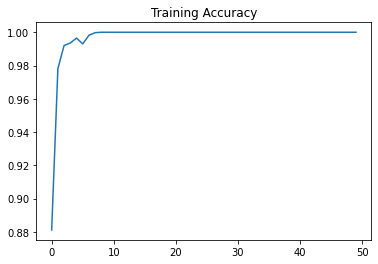

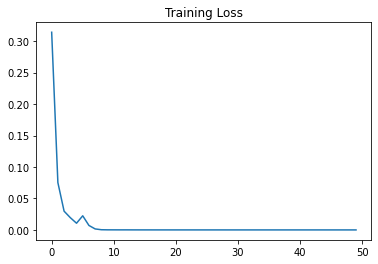

In [ ]:
# Accuracyနဲ့ loss တန်ဖိုးတွေက epoch အလိုက်ထုတ်ကြည့်ထားတာ
import matplotlib.pyplot as plt
acc = history.history[     'acc' ]
#val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
#val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) 
plt.plot  ( epochs,     acc ,label = 'Accuracy')
#plt.plot  ( epochs, val_acc)
#plt.title ('Training and validation accuracy')
plt.title ('Training Accuracy')
plt.figure()

plt.plot  ( epochs,     loss )
#plt.plot  ( epochs, val_loss )
#plt.title ('Training and validation loss')
plt.title ('Training Loss')

plt.show()

In [ ]:

classes = model.predict(test_set)

In [ ]:
#  တစ်ပုံချင်းစီကို Testလုပ်တာ
folder_names = ['Giveway','NoEntry','NoHorn','Roundabout','Stop']
y_pred = []
for folder in folder_names:
    path = test_dir+"/"+folder
    path_fnames = os.listdir(path)
    for i in path_fnames:
        path2 = path+'/'+i
        img = tf.keras.preprocessing.image.load_img(path2, target_size=(150,150))#target size ကို သတိထားပါ
        x = tf.keras.preprocessing.image.img_to_array(img)
        x = np.expand_dims(x,axis=0)
        x /= 255.0
        images = np.vstack([x])# [1 2 3 4 5 6]
        classes = model.predict(x)
        y_classes=classes.argmax(axis=-1)
        y_pred.append(y_classes[0])
    print()
    

In [ ]:
# Actual Labels
y_true = test_set.classes.tolist()
print(len(y_true))

1139


In [ ]:
# Class Labels
class_dictionary = test_set.class_indices
print('Labels dictionary',class_dictionary)

Labels dictionary {'Giveway': 0, 'NoEntry': 1, 'NoHorn': 2, 'Roundabout': 3, 'Stop': 4}


In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_true,y_pred)
print('confusion_matrix')
print(confusion_matrix)

confusion_matrix
[[238   0   0   0   0]
 [  0 238   0   0   0]
 [  0   0 221   0   0]
 [  0   0   0 204   0]
 [  0   0   0   0 238]]


In [ ]:
y_true

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [ ]:
y_pred

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

print('Accuracy Score',accuracy_score(y_true, y_pred)*100,'%')
print('Precision Macro Score ',precision_score(y_true, y_pred,average = 'macro')*100,'%')
print('Recall_Score',recall_score(y_true, y_pred, average = 'macro')*100,'%')
print('F1_Score',f1_score(y_true, y_pred, average = 'macro')*100,'%')

Accuracy Score 100.0 %
Precision Macro Score  100.0 %
Recall_Score 100.0 %
F1_Score 100.0 %


In [ ]:
# model ကို သိမ်းတာကလည်း အရေးကြီးတယ်။
model.save('/Final.h5')

In [ ]:
# Congratulations

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# How to implement your model with streamlit: https://github.com/ThuraAung1601